# Week # 6


In [59]:
import pandas as pd
import random as rd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
from sklearn.cluster import KMeans

In [43]:
iris_df = pd.read_csv("iris_csv.csv")


In [44]:
iris_df.sample(10)

,sepallength,sepalwidth,petallength,petalwidth,class
103,6.3,2.9,5.6,1.8,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa
91,6.1,3.0,4.6,1.4,Iris-versicolor
126,6.2,2.8,4.8,1.8,Iris-virginica
110,6.5,3.2,5.1,2.0,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
37,4.9,3.1,1.5,0.1,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica


In [45]:
cols = iris_df.columns[:-1]

array([[<AxesSubplot:xlabel='sepallength', ylabel='sepallength'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='sepallength'>,
        <AxesSubplot:xlabel='petallength', ylabel='sepallength'>,
        <AxesSubplot:xlabel='petalwidth', ylabel='sepallength'>],
       [<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='sepalwidth'>,
        <AxesSubplot:xlabel='petallength', ylabel='sepalwidth'>,
        <AxesSubplot:xlabel='petalwidth', ylabel='sepalwidth'>],
       [<AxesSubplot:xlabel='sepallength', ylabel='petallength'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='petallength'>,
        <AxesSubplot:xlabel='petallength', ylabel='petallength'>,
        <AxesSubplot:xlabel='petalwidth', ylabel='petallength'>],
       [<AxesSubplot:xlabel='sepallength', ylabel='petalwidth'>,
        <AxesSubplot:xlabel='sepalwidth', ylabel='petalwidth'>,
        <AxesSubplot:xlabel='petallength', ylabel='petalwidth'>,
        <AxesSubplot:

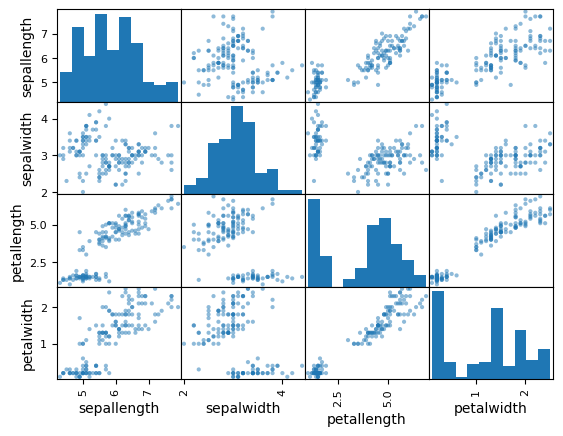

In [46]:
pd.plotting.scatter_matrix(iris_df[cols])


In [47]:
pca = PCA(n_components=2)
pca.fit(iris_df[cols])
transformed_irirs = pca.transform(iris_df[cols])

In [50]:
transformed_irirs.shape

(150, 2)

In [53]:

color = dict(zip(iris_df["class"].unique(),["red","green","blue"]))

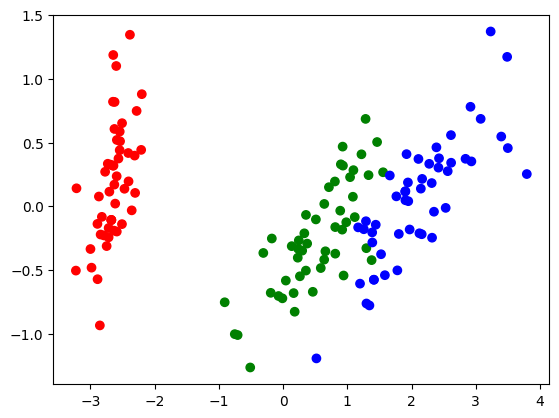

In [54]:
plt.scatter(transformed_irirs[:,0],transformed_irirs[:,1], c=iris_df["class"].apply(lambda x: color.get(x)))

In [56]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=cols)
loadings

,PC1,PC2
sepallength,0.361590,0.656540
sepalwidth,-0.082269,0.729712
petallength,0.856572,-0.175767
petalwidth,0.358844,-0.074706


In [57]:
iris_df.corr(method="pearson")


,sepallength,sepalwidth,petallength,petalwidth
sepallength,1.000000,-0.109369,0.871754,0.817954
sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
petallength,0.871754,-0.420516,1.000000,0.962757
petalwidth,0.817954,-0.356544,0.962757,1.000000


In [ ]:
transformed_irirs

In [62]:


kmeans = KMeans(n_clusters=3).fit(iris_df[cols])
predictions = kmeans.predict(iris_df[cols])

iris_df["cluster"] = pd.Categorical(predictions)

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

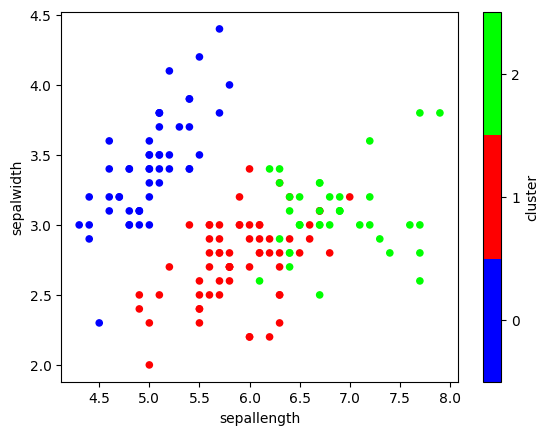

In [65]:
iris_df.plot.scatter(0, 1, c='cluster', colormap='brg')